In [14]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

df = pd.read_csv('autoscout24-germany-dataset.csv')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')


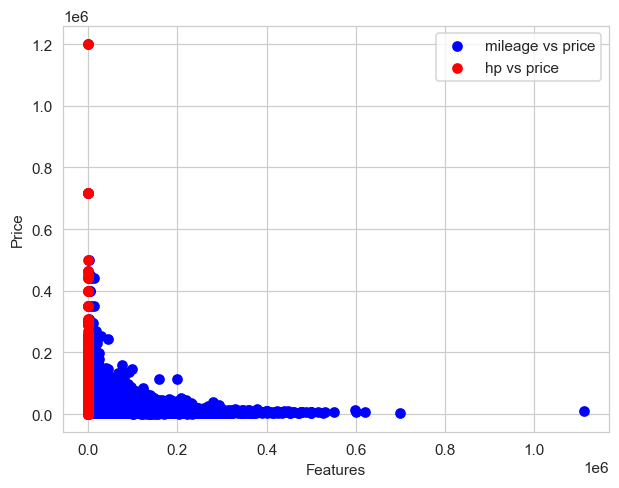

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Überprüfe die Spaltennamen
print(df.columns)

# Wähle die Features und die Zielvariable
# Beispiel: mileage und hp als Features, price als Zielvariable
X = df[['mileage', 'hp']]  # Unabhängige Variablen
y = df['price']            # Abhängige Variable

# Erstelle und trainiere das Modell
model = LinearRegression()
model.fit(X, y)

# Optional: Visualisiere die Beziehung zwischen Features und Zielvariable
plt.scatter(X['mileage'], y, color='blue', label='mileage vs price')
plt.scatter(X['hp'], y, color='red', label='hp vs price')
plt.xlabel('Features')
plt.ylabel('Price')
plt.legend()
plt.show()


--- Lagemaße für Features (X) ---
            mileage            hp
count  4.394700e+04  43947.000000
mean   7.231258e+04    133.624571
std    6.217336e+04     75.049853
min    0.000000e+00      1.000000
25%    2.150000e+04     86.000000
50%    6.130900e+04    116.000000
75%    1.060000e+05    150.000000
max    1.111111e+06    850.000000

--- Lagemaße für die Zielvariable (y) ---
Mittelwert (Mean) von 'price': 16546.56
Median von 'price': 10990.00
Modus von 'price': 7990.00


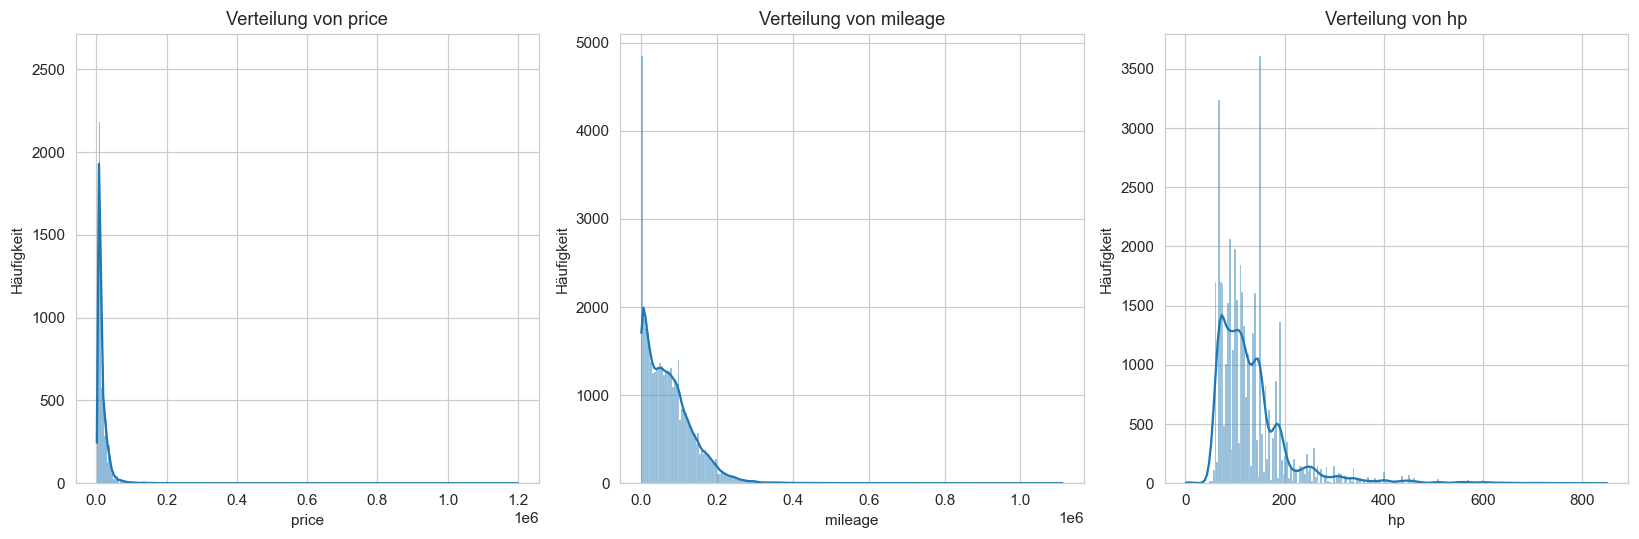


Trainingsset Größe: 35157 Proben
Testset Größe: 8790 Proben

Modell erfolgreich trainiert!


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


print("\n--- Lagemaße für Features (X) ---")
# Für numerische Features können wir describe() verwenden, das Mittelwert, Median (50%), etc. anzeigt
print(X.describe())

print("\n--- Lagemaße für die Zielvariable (y) ---")
print(f"Mittelwert (Mean) von '{y.name}': {y.mean():.2f}")
print(f"Median von '{y.name}': {y.median():.2f}")

# Für den Modus: kann mehrere Werte haben, daher series.mode()
modus_y = y.mode()
if len(modus_y) == 0:
    print(f"Modus von '{y.name}': Keine eindeutige Mode gefunden (alle Werte sind einzigartig oder treten gleich oft auf).")
elif len(modus_y) == 1:
    print(f"Modus von '{y.name}': {modus_y[0]:.2f}")
else:
    print(f"Modus von '{y.name}': Mehrere Modi vorhanden: {modus_y.tolist()}")

# Optional: Histogramme zur Visualisierung der Verteilung
plt.figure(figsize=(15, 5))

plt.subplot(1, len(X.columns) + 1, 1) # Eine Subplot für die Zielvariable und dann für Features
sns.histplot(y, kde=True)
plt.title(f'Verteilung von {y.name}')
plt.xlabel(y.name)
plt.ylabel('Häufigkeit')

for i, col in enumerate(X.columns):
    plt.subplot(1, len(X.columns) + 1, i + 2)
    sns.histplot(X[col], kde=True)
    plt.title(f'Verteilung von {col}')
    plt.xlabel(col)
    plt.ylabel('Häufigkeit')
plt.tight_layout()
plt.show()

# --- Rest des bestehenden Codes (Daten aufteilen, Modell trainieren, etc.) ---
# Teile die Daten in Trainings- und Testsets auf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(f"\nTrainingsset Größe: {X_train.shape[0]} Proben")
print(f"Testset Größe: {X_test.shape[0]} Proben")

# Initialisiere das Lineare Regressionsmodell
model = LinearRegression()

# Trainiere das Modell mit den Trainingsdaten
model.fit(X_train, y_train)

print("\nModell erfolgreich trainiert!")

# Treffe Vorhersagen auf dem Testset
y_pred = model.predict(X_test)


--- Chi-Quadrat-Tests für kategoriale Variablen ---

Chi-Quadrat-Test: fuel vs. gear
Kreuztabelle:
gear               Automatic  Manual  Semi-automatic
fuel                                                
-/- (Fuel)                 5      15               0
CNG                       21      92               0
Diesel                  6999    7671              14
Electric                 624      15               0
Electric/Diesel           43       6               0
Electric/Gasoline        818     221               0
Ethanol                    0       2               0
Gasoline                6604   20602              40
Hydrogen                   1       0               0
LPG                       16      93               0
Others                    10      35               0
Chi2-Wert: 4526.43
p-Wert: 0.000
Freiheitsgrade (dof): 20
Interpretation: Es besteht ein signifikanter Zusammenhang zwischen Kraftstoffart und Getriebe (p < 0.05).

Chi-Quadrat-Test: make vs. diskretisierter Pre

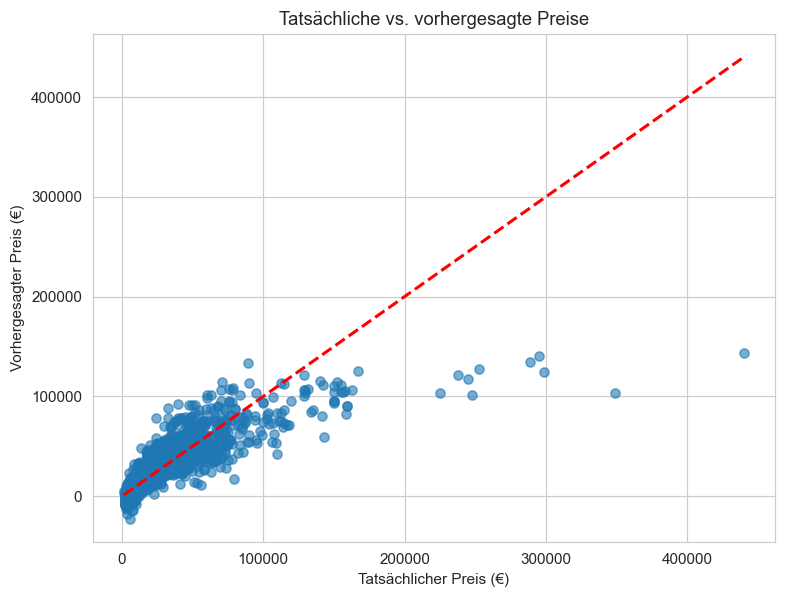

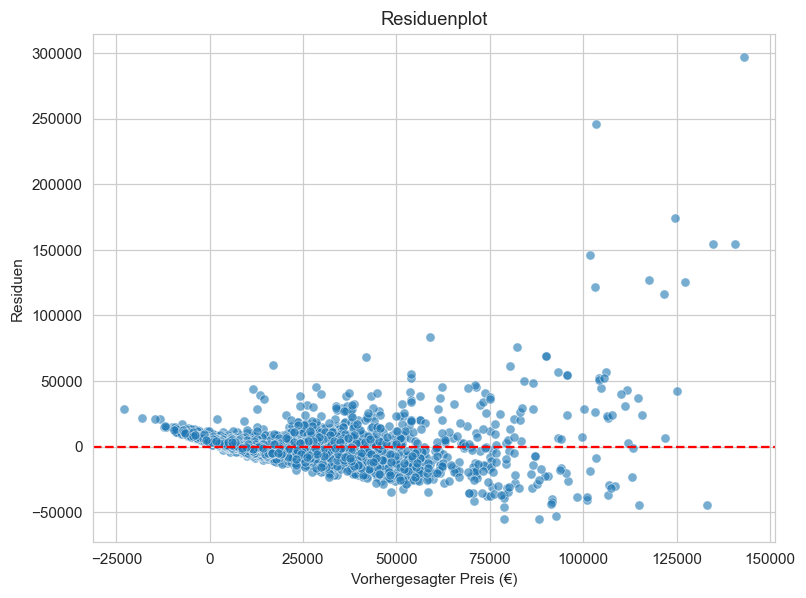

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Features und Zielvariable definieren
X = df[['mileage', 'make', 'model', 'fuel', 'gear']]
y = df['price']

print("\n--- Chi-Quadrat-Tests für kategoriale Variablen ---")

# Test 1: Zusammenhang zwischen Kraftstoffart und Getriebe
print("\nChi-Quadrat-Test: fuel vs. gear")
contingency_table_1 = pd.crosstab(df['fuel'], df['gear'])
print("Kreuztabelle:")
print(contingency_table_1)

chi2_1, p_1, dof_1, expected_1 = chi2_contingency(contingency_table_1)
print(f"Chi2-Wert: {chi2_1:.2f}")
print(f"p-Wert: {p_1:.3f}")
print(f"Freiheitsgrade (dof): {dof_1}")

if p_1 < 0.05:
    print("Interpretation: Es besteht ein signifikanter Zusammenhang zwischen Kraftstoffart und Getriebe (p < 0.05).")
else:
    print("Interpretation: Es besteht kein signifikanter Zusammenhang zwischen Kraftstoffart und Getriebe (p >= 0.05).")

# Test 2: Zusammenhang zwischen Marke und diskretisiertem Preis
print("\nChi-Quadrat-Test: make vs. diskretisierter Preis")

# Preis in Kategorien einteilen
bins = [df['price'].min() - 1, 7000, 7500, df['price'].max() + 1]
labels = ['Niedrig', 'Mittel', 'Hoch']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

contingency_table_2 = pd.crosstab(df['make'], df['price_category'])
print("Kreuztabelle:")
print(contingency_table_2)

chi2_2, p_2, dof_2, expected_2 = chi2_contingency(contingency_table_2)
print(f"Chi2-Wert: {chi2_2:.2f}")
print(f"p-Wert: {p_2:.3f}")
print(f"Freiheitsgrade (dof): {dof_2}")

if p_2 < 0.05:
    print("Interpretation: Es besteht ein signifikanter Zusammenhang zwischen Marke und Preiskategorie (p < 0.05).")
else:
    print("Interpretation: Es besteht kein signifikanter Zusammenhang zwischen Marke und Preiskategorie (p >= 0.05).")

# Für die Lineare Regression nur numerische Features verwenden
X_for_regression = df[['mileage', 'hp', 'year']]
y_for_regression = df['price']

X_train, X_test, y_train, y_test = train_test_split(X_for_regression, y_for_regression, test_size=0.2, random_state=33)

print(f"\nTrainingsset Größe: {X_train.shape[0]} Fahrzeuge")
print(f"Testset Größe: {X_test.shape[0]} Fahrzeuge")

model = LinearRegression()
model.fit(X_train, y_train)

print("\nModell erfolgreich trainiert!")

y_pred = model.predict(X_test)

print("\nErste 10 Vorhersagen (in Euro):")
print(y_pred[:10])

print("\nEntsprechende tatsächliche Preise (in Euro):")
print(y_test.head(10).values)

mse = mean_squared_error(y_test, y_pred)
print(f"\nMittlerer Quadratischer Fehler (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Wurzel aus dem Mittleren Quadratischen Fehler (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"Bestimmtheitskoeffizient (R-squared): {r2:.2f}")

print("\nModellkoeffizienten:")
for feature, coef in zip(X_for_regression.columns, model.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"Achsenabschnitt (Intercept): {model.intercept_:.2f}")

# Visualisierung der Vorhersagen
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Tatsächlicher Preis (€)")
plt.ylabel("Vorhergesagter Preis (€)")
plt.title("Tatsächliche vs. vorhergesagte Preise")
plt.grid(True)
plt.show()

# Residuenplot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Vorhergesagter Preis (€)")
plt.ylabel("Residuen")
plt.title("Residuenplot")
plt.grid(True)
plt.show()


Spaltennamen des DataFrames:
Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

Erste Zeilen des DataFrames:
   mileage        make   model      fuel    gear offerType  price     hp  year
0   235000         BMW     316    Diesel  Manual      Used   6800  116.0  2011
1    92800  Volkswagen    Golf  Gasoline  Manual      Used   6877  122.0  2011
2   149300        SEAT    Exeo  Gasoline  Manual      Used   6900  160.0  2011
3    96200     Renault  Megane  Gasoline  Manual      Used   6950  110.0  2011
4   156000     Peugeot     308  Gasoline  Manual      Used   6950  156.0  2011

Anzahl fehlender Werte pro Spalte:
mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp             0
year           0
dtype: int64

Fehlende Werte nach dem Auffüllen (sollte 0 sein):
mileage        0
make           0
model        143
fuel           0
gear         182
offerType  

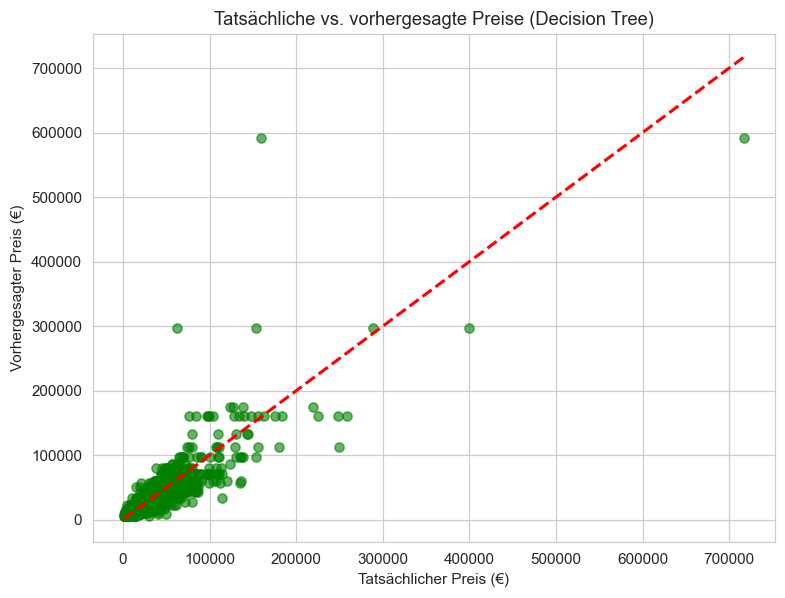

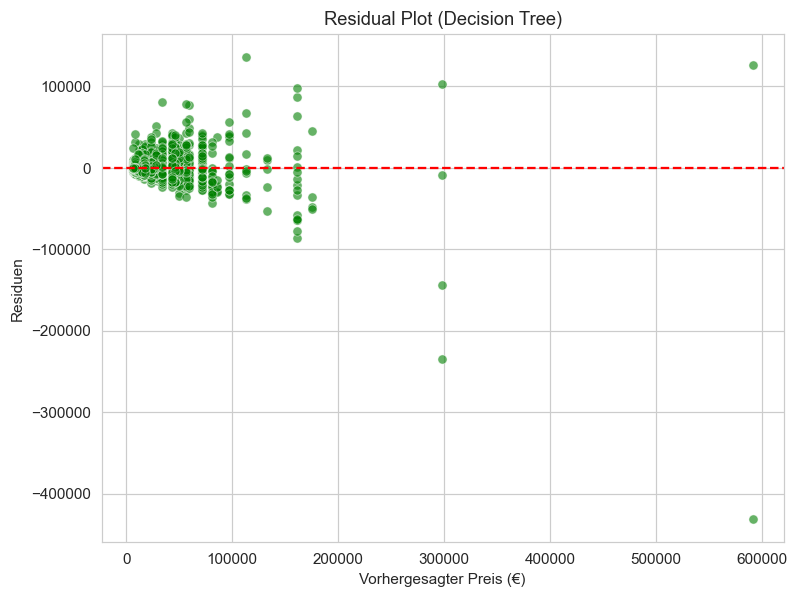


--- Lineare Regression (zum Vergleich) ---
Lineares Regressionsmodell erfolgreich trainiert!

Mittlerer Quadratischer Fehler (MSE) [Lineare Regression]: 111958346.40
Wurzel aus dem Mittleren Quadratischen Fehler (RMSE) [Lineare Regression]: 10581.04
Bestimmtheitskoeffizient (R-squared) [Lineare Regression]: 0.67

Modellkoeffizienten (Lineare Regression):
  mileage: -0.06
  hp: 185.47
  year: 962.53
Achsenabschnitt (Intercept) [Lineare Regression]: -1944428.72


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Zeige die Spaltennamen und die ersten Zeilen des DataFrames an
print("Spaltennamen des DataFrames:")
print(df.columns)
print("\nErste Zeilen des DataFrames:")
print(df.head())

# Überprüfe auf fehlende Werte
print("\nAnzahl fehlender Werte pro Spalte:")
print(df.isnull().sum())

# Auffüllen fehlender Werte
for column in df.select_dtypes(include=np.number).columns:
    if df[column].isnull().any():
        df[column].fillna(df[column].mean(), inplace=True)
print("\nFehlende Werte nach dem Auffüllen (sollte 0 sein):")
print(df.isnull().sum())

# Für die Regression verwenden wir nur die numerischen Features
X_for_regression = df[['mileage', 'hp', 'year']]  # Numerische Features
y_for_regression = df['price']  # Zielvariable

# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X_for_regression, y_for_regression, test_size=0.2, random_state=33)

print(f"\nTrainingsset Größe: {X_train.shape[0]} Fahrzeuge")
print(f"Testset Größe: {X_test.shape[0]} Fahrzeuge")

# Decision Tree Regression
print("\n--- Decision Tree Regression ---")

dt_model = DecisionTreeRegressor(random_state=33, max_depth=5)
dt_model.fit(X_train, y_train)

print("Decision Tree Modell erfolgreich trainiert!")

dt_y_pred = dt_model.predict(X_test)

print("\nErste 10 Vorhersagen auf dem Testset (Decision Tree):")
print(dt_y_pred[:10])

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_y_pred)

print(f"\nMittlerer Quadratischer Fehler (MSE) [Decision Tree]: {dt_mse:.2f}")
print(f"Wurzel aus dem Mittleren Quadratischen Fehler (RMSE) [Decision Tree]: {dt_rmse:.2f}")
print(f"Bestimmtheitskoeffizient (R-squared) [Decision Tree]: {dt_r2:.2f}")

print("\nFeature Importance (Decision Tree):")
for feature, importance in zip(X_for_regression.columns, dt_model.feature_importances_):
    print(f"  {feature}: {importance:.4f}")

# Visualisierung Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Tatsächlicher Preis (€)")
plt.ylabel("Vorhergesagter Preis (€)")
plt.title("Tatsächliche vs. vorhergesagte Preise (Decision Tree)")
plt.grid(True)
plt.show()

# Residual Plot Decision Tree
dt_residuals = y_test - dt_y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dt_y_pred, y=dt_residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Vorhergesagter Preis (€)")
plt.ylabel("Residuen")
plt.title("Residual Plot (Decision Tree)")
plt.grid(True)
plt.show()

# Lineare Regression zum Vergleich
print("\n--- Lineare Regression (zum Vergleich) ---")

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

print("Lineares Regressionsmodell erfolgreich trainiert!")

lr_y_pred = model_lr.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_y_pred)

print(f"\nMittlerer Quadratischer Fehler (MSE) [Lineare Regression]: {lr_mse:.2f}")
print(f"Wurzel aus dem Mittleren Quadratischen Fehler (RMSE) [Lineare Regression]: {lr_rmse:.2f}")
print(f"Bestimmtheitskoeffizient (R-squared) [Lineare Regression]: {lr_r2:.2f}")

print("\nModellkoeffizienten (Lineare Regression):")
for feature, coef in zip(X_for_regression.columns, model_lr.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"Achsenabschnitt (Intercept) [Lineare Regression]: {model_lr.intercept_:.2f}")


Spaltennamen des DataFrames:
Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

Erste Zeilen des DataFrames:
   mileage        make   model      fuel    gear offerType  price     hp  year
0   235000         BMW     316    Diesel  Manual      Used   6800  116.0  2011
1    92800  Volkswagen    Golf  Gasoline  Manual      Used   6877  122.0  2011
2   149300        SEAT    Exeo  Gasoline  Manual      Used   6900  160.0  2011
3    96200     Renault  Megane  Gasoline  Manual      Used   6950  110.0  2011
4   156000     Peugeot     308  Gasoline  Manual      Used   6950  156.0  2011

Anzahl fehlender Werte pro Spalte:
mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

Fehlende Werte nach dem Auffüllen (sollte 0 sein):
mileage        0
make           0
model        143
fuel           0
gear         182
offerType  

C:\Users\Lenny\AppData\Local\Temp\ipykernel_4720\3681678705.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


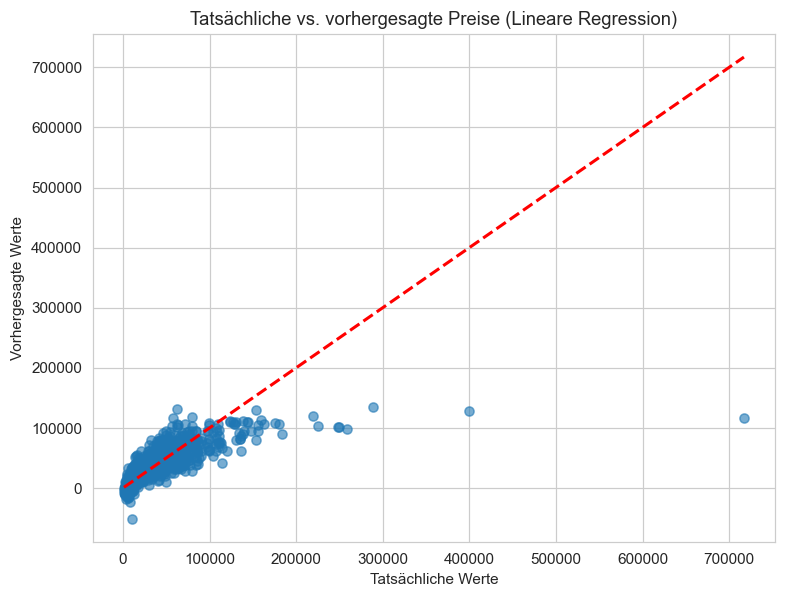

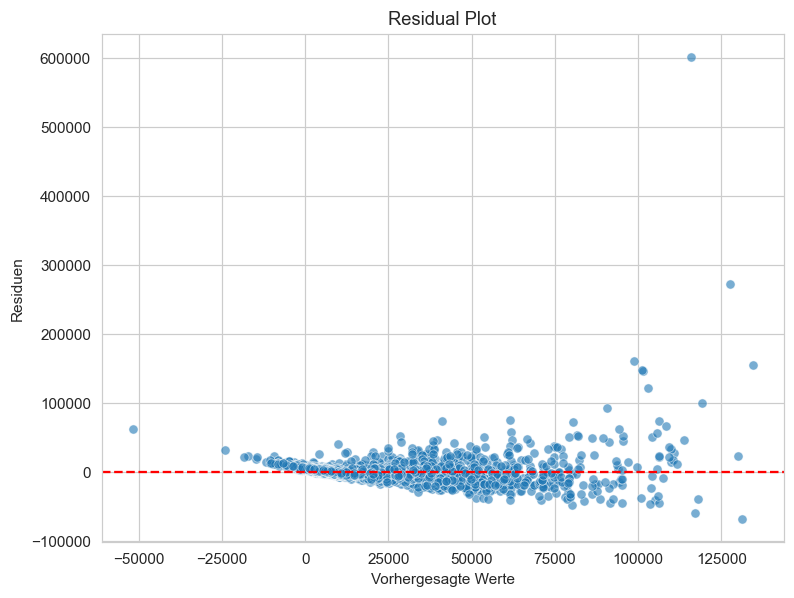

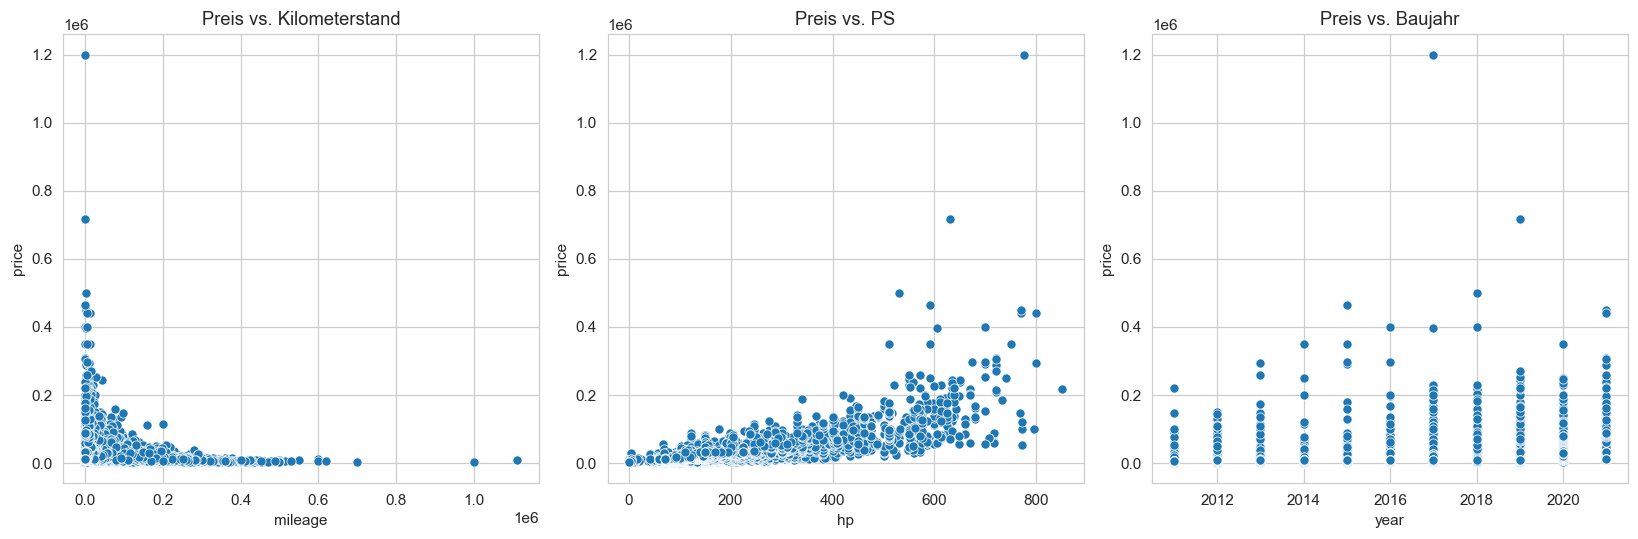

In [19]:
# Importiere benötigte Bibliotheken
import pandas as pd
import numpy as np

# Lade die CSV-Datei
df = pd.read_csv('autoscout24-germany-dataset.csv')

# Zeige die Spaltennamen und die ersten Zeilen des DataFrames an
print("Spaltennamen des DataFrames:")
print(df.columns)
print("\nErste Zeilen des DataFrames:")
print(df.head())

# Überprüfe auf fehlende Werte
print("\nAnzahl fehlender Werte pro Spalte:")
print(df.isnull().sum())

# Auffüllen fehlender Werte mit dem Mittelwert (nur für numerische Spalten)
for column in df.select_dtypes(include=np.number).columns:
    if df[column].isnull().any():
        df[column].fillna(df[column].mean(), inplace=True)
print("\nFehlende Werte nach dem Auffüllen (sollte 0 sein):")
print(df.isnull().sum())

# Definiere Features (X) und Zielvariable (y)
# Wir verwenden 'mileage', 'hp', und 'year' als Features, um 'price' vorherzusagen
X = df[['mileage', 'hp', 'year']]
y = df['price']



# Teile die Daten in Trainings- und Testsets auf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(f"\nTrainingsset Größe: {X_train.shape[0]} Proben")
print(f"Testset Größe: {X_test.shape[0]} Proben")

# Initialisiere das Lineare Regressionsmodell
model = LinearRegression()

# Trainiere das Modell mit den Trainingsdaten
model.fit(X_train, y_train)

print("\nModell erfolgreich trainiert!")

# Treffe Vorhersagen auf dem Testset
y_pred = model.predict(X_test)

print("\nErste 10 Vorhersagen auf dem Testset:")
print(y_pred[:10])

print("\nEntsprechende tatsächliche Werte aus dem Testset:")
print(y_test.head(10).values)

# Bewerte die Leistung des Modells
mse = mean_squared_error(y_test, y_pred)
print(f"\nMittlerer Quadratischer Fehler (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Wurzel aus dem Mittleren Quadratischen Fehler (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"Bestimmtheitskoeffizient (R-squared): {r2:.2f}")

# Zeige die Koeffizienten und den Achsenabschnitt des Modells
print("\nModellkoeffizienten:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"Achsenabschnitt (Intercept): {model.intercept_:.2f}")

# Visualisierung der Vorhersagen vs. tatsächliche Werte
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagte Werte")
plt.title("Tatsächliche vs. vorhergesagte Preise (Lineare Regression)")
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Vorhergesagte Werte")
plt.ylabel("Residuen")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Preis vs. Kilometerstand')
plt.subplot(1, 3, 2)
sns.scatterplot(x='hp', y='price', data=df)
plt.title('Preis vs. PS')
plt.subplot(1, 3, 3)
sns.scatterplot(x='year', y='price', data=df)
plt.title('Preis vs. Baujahr')
plt.tight_layout()
plt.show()



--- Lagemaße für Features (X) ---
            mileage            hp          year
count  4.640500e+04  46405.000000  46405.000000
mean   7.117786e+04    132.990987   2016.012951
std    6.262531e+04     75.425705      3.155214
min    0.000000e+00      1.000000   2011.000000
25%    1.980000e+04     86.000000   2013.000000
50%    6.000000e+04    116.000000   2016.000000
75%    1.050000e+05    150.000000   2019.000000
max    1.111111e+06    850.000000   2021.000000

--- Lagemaße für den Preis (y) ---
Mittelwert (Mean) des Preises: 16572.34 €
Median des Preises: 10999.00 €
Modus des Preises: 7990.00 €


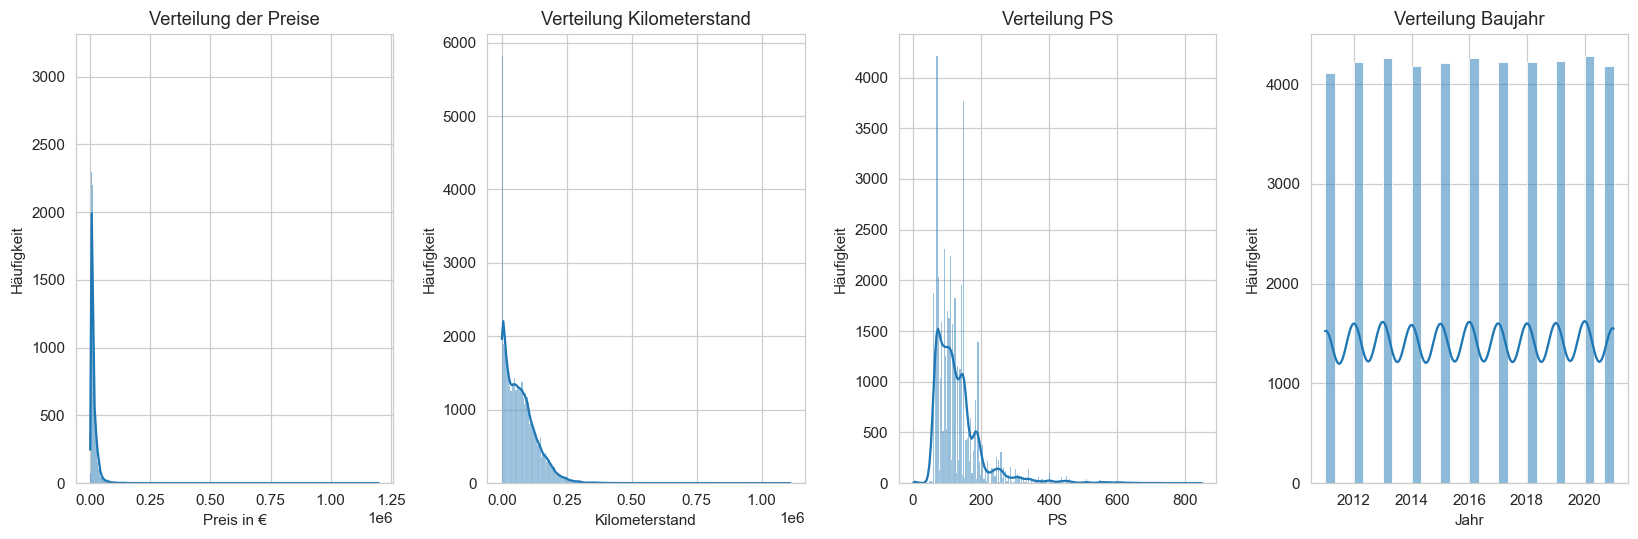


Trainingsset Größe: 37124 Fahrzeuge
Testset Größe: 9281 Fahrzeuge

Modell erfolgreich trainiert!

Mittlerer Quadratischer Fehler (MSE): 111958346.40
Wurzel aus dem Mittleren Quadratischen Fehler (RMSE): 10581.04
Bestimmtheitskoeffizient (R²): 0.67

Modellkoeffizienten:
  mileage: -0.06
  hp: 185.47
  year: 962.53
Achsenabschnitt (Intercept): -1944428.72


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Für die Regression verwenden wir die numerischen Features
X = df[['mileage', 'hp', 'year']]  # Numerische Features
y = df['price']  # Zielvariable

# Lagemaße berechnen
print("\n--- Lagemaße für Features (X) ---")
print(X.describe())

print("\n--- Lagemaße für den Preis (y) ---")
print(f"Mittelwert (Mean) des Preises: {y.mean():.2f} €")
print(f"Median des Preises: {y.median():.2f} €")

# Modus für den Preis
modus_y = y.mode()
if len(modus_y) == 0:
    print("Modus des Preises: Keine eindeutige Mode gefunden")
elif len(modus_y) == 1:
    print(f"Modus des Preises: {modus_y[0]:.2f} €")
else:
    print(f"Modus des Preises: Mehrere Modi vorhanden: {modus_y.tolist()}")

# Visualisierung der Verteilungen
plt.figure(figsize=(15, 5))

# Preis-Verteilung
plt.subplot(1, 4, 1)
sns.histplot(y, kde=True)
plt.title('Verteilung der Preise')
plt.xlabel('Preis in €')
plt.ylabel('Häufigkeit')

# Kilometerstand-Verteilung
plt.subplot(1, 4, 2)
sns.histplot(X['mileage'], kde=True)
plt.title('Verteilung Kilometerstand')
plt.xlabel('Kilometerstand')
plt.ylabel('Häufigkeit')

# PS-Verteilung
plt.subplot(1, 4, 3)
sns.histplot(X['hp'], kde=True)
plt.title('Verteilung PS')
plt.xlabel('PS')
plt.ylabel('Häufigkeit')

# Baujahr-Verteilung
plt.subplot(1, 4, 4)
sns.histplot(X['year'], kde=True)
plt.title('Verteilung Baujahr')
plt.xlabel('Jahr')
plt.ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(f"\nTrainingsset Größe: {X_train.shape[0]} Fahrzeuge")
print(f"Testset Größe: {X_test.shape[0]} Fahrzeuge")

# Modell trainieren
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModell erfolgreich trainiert!")

# Vorhersagen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMittlerer Quadratischer Fehler (MSE): {mse:.2f}")
print(f"Wurzel aus dem Mittleren Quadratischen Fehler (RMSE): {rmse:.2f}")
print(f"Bestimmtheitskoeffizient (R²): {r2:.2f}")

# Koeffizienten ausgeben
print("\nModellkoeffizienten:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"Achsenabschnitt (Intercept): {model.intercept_:.2f}")




Spaltennamen des DataFrames:
Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

Erste Zeilen des DataFrames:
   mileage        make   model      fuel    gear offerType  price     hp  year
0   235000         BMW     316    Diesel  Manual      Used   6800  116.0  2011
1    92800  Volkswagen    Golf  Gasoline  Manual      Used   6877  122.0  2011
2   149300        SEAT    Exeo  Gasoline  Manual      Used   6900  160.0  2011
3    96200     Renault  Megane  Gasoline  Manual      Used   6950  110.0  2011
4   156000     Peugeot     308  Gasoline  Manual      Used   6950  156.0  2011

Anzahl fehlender Werte pro Spalte:
mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp             0
year           0
dtype: int64

Fehlende Werte nach dem Auffüllen (sollte 0 sein):
mileage        0
make           0
model        143
fuel           0
gear         182
offerType  

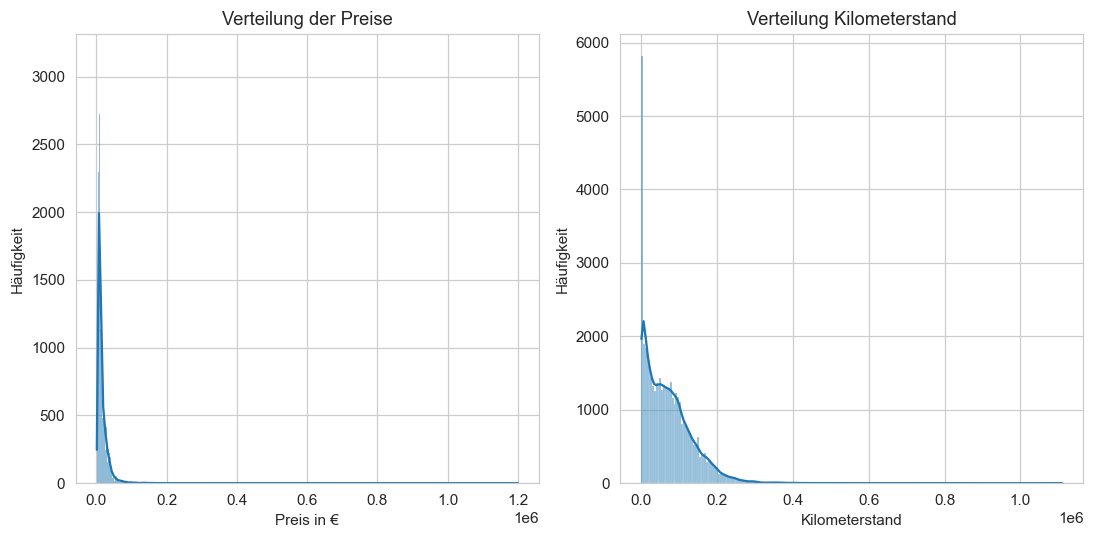


Trainingsset Größe: 37124 Fahrzeuge
Testset Größe: 9281 Fahrzeuge

Modell erfolgreich trainiert!

Mittlerer Quadratischer Fehler (MSE): 111958346.40
Wurzel aus dem Mittleren Quadratischen Fehler (RMSE): 10581.04
Bestimmtheitskoeffizient (R²): 0.67

Modellkoeffizienten:
  mileage: -0.06
  hp: 185.47
  year: 962.53
Achsenabschnitt (Intercept): -1944428.72


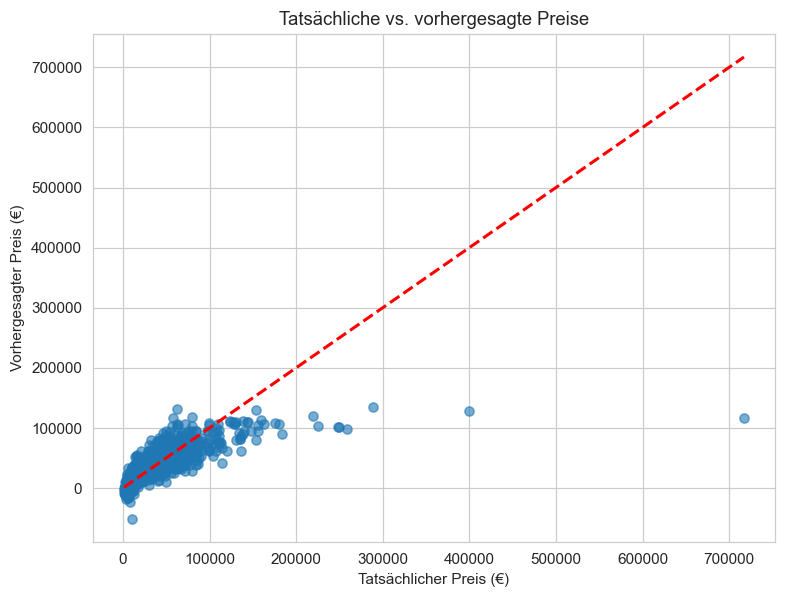

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Zeige die Spaltennamen und die ersten Zeilen des DataFrames an
print("Spaltennamen des DataFrames:")
print(df.columns)
print("\nErste Zeilen des DataFrames:")
print(df.head())

# Überprüfe auf fehlende Werte
print("\nAnzahl fehlender Werte pro Spalte:")
print(df.isnull().sum())

# Auffüllen fehlender Werte für numerische Spalten
for column in df.select_dtypes(include=np.number).columns:
    if df[column].isnull().any():
        df[column].fillna(df[column].mean(), inplace=True)
print("\nFehlende Werte nach dem Auffüllen (sollte 0 sein):")
print(df.isnull().sum())

# Features und Zielvariable definieren
X = df[['mileage', 'make', 'model', 'fuel', 'gear']]  # Features
y = df['price']  # Zielvariable

# Chi-Quadrat-Tests
print("\n--- Chi-Quadrat-Tests für kategoriale Variablen ---")

# Test 1: Zusammenhang zwischen Kraftstoffart und Getriebe
print("\nChi-Quadrat-Test: fuel vs. gear")
contingency_table_1 = pd.crosstab(df['fuel'], df['gear'])
print("Kreuztabelle:")
print(contingency_table_1)

chi2_1, p_1, dof_1, expected_1 = chi2_contingency(contingency_table_1)
print(f"Chi2-Wert: {chi2_1:.2f}")
print(f"p-Wert: {p_1:.3f}")
print(f"Freiheitsgrade (dof): {dof_1}")

if p_1 < 0.05:
    print("Interpretation: Es besteht ein signifikanter Zusammenhang zwischen Kraftstoffart und Getriebe (p < 0.05).")
else:
    print("Interpretation: Es besteht kein signifikanter Zusammenhang zwischen Kraftstoffart und Getriebe (p >= 0.05).")

# Test 2: Zusammenhang zwischen Marke und Preiskategorie
print("\nChi-Quadrat-Test: make vs. diskretisierter Preis")

# Preis in Kategorien einteilen
bins = [df['price'].min() - 1, 7000, 7500, df['price'].max() + 1]
labels = ['Niedrig', 'Mittel', 'Hoch']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

contingency_table_2 = pd.crosstab(df['make'], df['price_category'])
print("Kreuztabelle:")
print(contingency_table_2)

chi2_2, p_2, dof_2, expected_2 = chi2_contingency(contingency_table_2)
print(f"Chi2-Wert: {chi2_2:.2f}")
print(f"p-Wert: {p_2:.3f}")
print(f"Freiheitsgrade (dof): {dof_2}")

if p_2 < 0.05:
    print("Interpretation: Es besteht ein signifikanter Zusammenhang zwischen Marke und Preiskategorie (p < 0.05).")
else:
    print("Interpretation: Es besteht kein signifikanter Zusammenhang zwischen Marke und Preiskategorie (p >= 0.05).")

# Lagemaße
print("\n--- Lagemaße für Features (X) ---")
print(X.describe())

print("\n--- Lagemaße für den Preis (y) ---")
print(f"Mittelwert des Preises: {y.mean():.2f} €")
print(f"Median des Preises: {y.median():.2f} €")

modus_y = y.mode()
if len(modus_y) == 0:
    print("Modus des Preises: Keine eindeutige Mode gefunden")
elif len(modus_y) == 1:
    print(f"Modus des Preises: {modus_y[0]:.2f} €")
else:
    print(f"Modus des Preises: Mehrere Modi vorhanden: {modus_y.tolist()}")

# Visualisierungen für numerische Daten
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(y, kde=True)
plt.title('Verteilung der Preise')
plt.xlabel('Preis in €')
plt.ylabel('Häufigkeit')

plt.subplot(1, 3, 2)
sns.histplot(X['mileage'], kde=True)
plt.title('Verteilung Kilometerstand')
plt.xlabel('Kilometerstand')
plt.ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

# Für die Regression nur numerische Features verwenden
X_for_regression = df[['mileage', 'hp', 'year']]
y_for_regression = df['price']

X_train, X_test, y_train, y_test = train_test_split(X_for_regression, y_for_regression, test_size=0.2, random_state=33)

print(f"\nTrainingsset Größe: {X_train.shape[0]} Fahrzeuge")
print(f"Testset Größe: {X_test.shape[0]} Fahrzeuge")

# Modell trainieren
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModell erfolgreich trainiert!")

# Vorhersagen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMittlerer Quadratischer Fehler (MSE): {mse:.2f}")
print(f"Wurzel aus dem Mittleren Quadratischen Fehler (RMSE): {rmse:.2f}")
print(f"Bestimmtheitskoeffizient (R²): {r2:.2f}")

print("\nModellkoeffizienten:")
for feature, coef in zip(X_for_regression.columns, model.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"Achsenabschnitt (Intercept): {model.intercept_:.2f}")

# Visualisierung der Vorhersagen
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Tatsächlicher Preis (€)")
plt.ylabel("Vorhergesagter Preis (€)")
plt.title("Tatsächliche vs. vorhergesagte Preise")
plt.grid(True)
plt.show()


Datensatz erfolgreich geladen.
Anzahl der Zeilen nach Entfernung von Duplikaten: 44265

Fehlende Werte vor der Bereinigung:
mileage        0
make           0
model        137
fuel           0
gear         175
offerType      0
price          0
hp            24
year           0
dtype: int64

Fehlende Werte nach der Bereinigung:
mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

Anzahl der Zeilen nach Entfernung von 3-Sigma-Ausreißern: 42758
Log-Transformation für 'price' angewendet.
'mileage' ist nicht numerisch oder nicht rechtsschief genug für Log-Transformation.
Log-Transformation für 'hp' angewendet.
Feature 'mileage_per_year' erstellt.


<Figure size 1320x880 with 0 Axes>

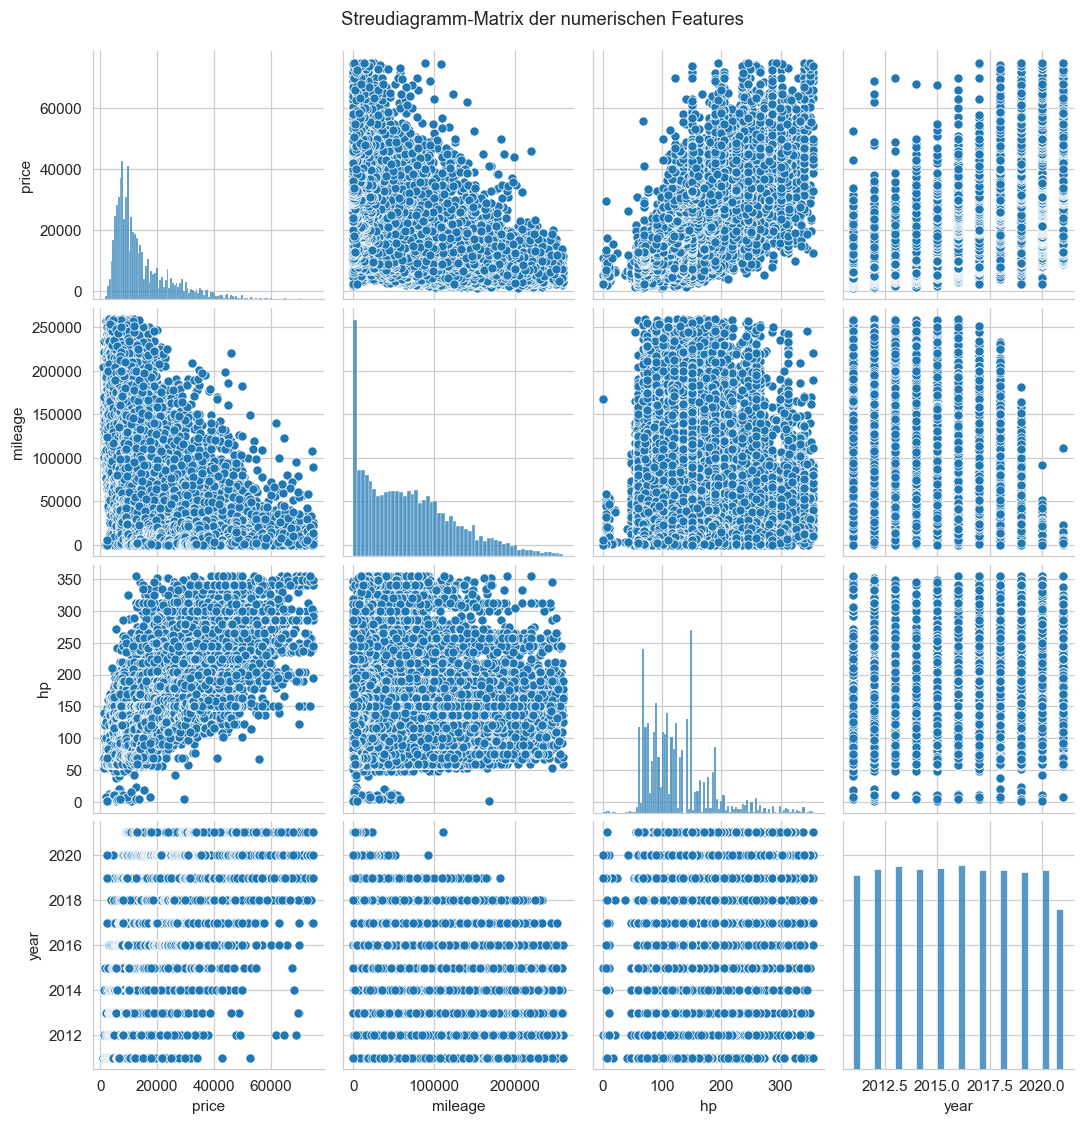

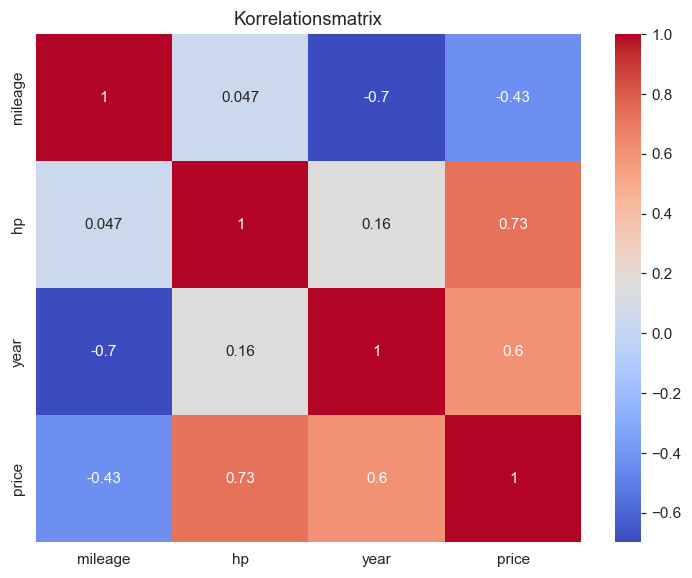


Trainingsset Größe: 34206 Proben
Testset Größe: 8552 Proben

Varianzinflationsfaktoren (VIF):
            feature         VIF
0           mileage   11.511513
1              year  140.407764
2            log_hp  144.305311
3  mileage_per_year   13.693765

Lineare Regression - R²: 0.864, RMSE: 0.24

Lasso Regression - R²: 0.805

Decision Tree - Beste Parameter: {'max_depth': 10, 'min_samples_split': 20}
Decision Tree - R²: 0.880


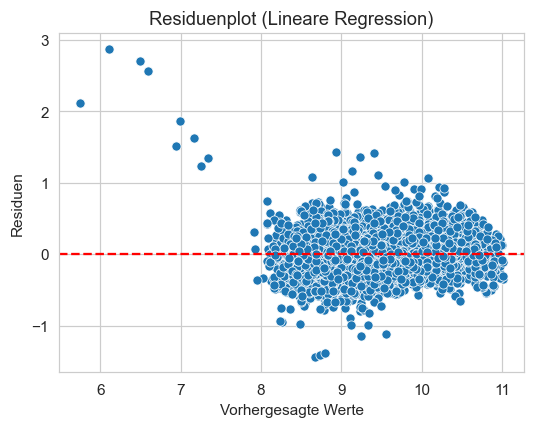

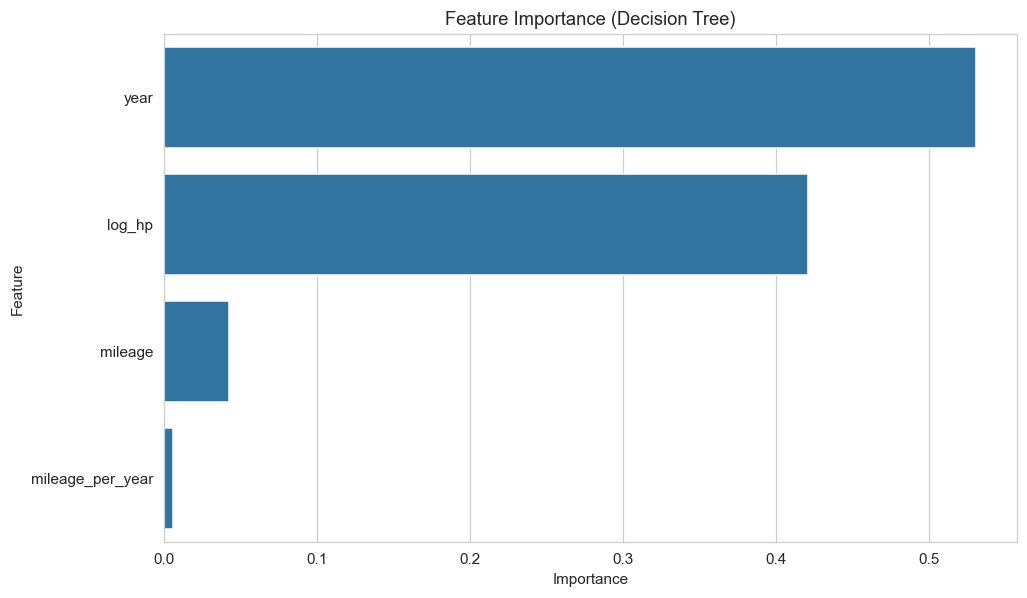

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso # Ridge wurde importiert, aber nicht verwendet
from sklearn.tree import DecisionTreeRegressor
# RandomForestRegressor wurde importiert, aber nicht verwendet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler # PolynomialFeatures wurde importiert, aber nicht verwendet
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Lade die CSV-Datei
try:
    df = pd.read_csv('autoscout24-germany-dataset.csv')
    print("Datensatz erfolgreich geladen.")
except FileNotFoundError:
    print("Fehler: 'autoscout24-germany-dataset.csv' nicht gefunden. Bitte stelle sicher, dass die Datei im selben Verzeichnis liegt.")
    exit() # Beende das Skript, wenn die Datei nicht gefunden wird

# Entferne Duplikate direkt nach dem Laden
df.drop_duplicates(inplace=True)
print(f"Anzahl der Zeilen nach Entfernung von Duplikaten: {len(df)}")

# 1. Datenbereinigung
print("\nFehlende Werte vor der Bereinigung:")
print(df.isnull().sum())

# Numerische Spalten: Fülle mit Median (robuster gegen Ausreißer)
# Korrektur der FutureWarning: Vermeide inplace=True in chained assignments
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().any(): # Prüfe nur, wenn fehlende Werte vorhanden sind
        df[col] = df[col].fillna(df[col].median())

# Kategoriale Spalten: Fülle mit Modus
# Korrektur der FutureWarning: Vermeide inplace=True in chained assignments
for col in df.select_dtypes(exclude=np.number).columns:
    if df[col].isnull().any(): # Prüfe nur, wenn fehlende Werte vorhanden sind
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nFehlende Werte nach der Bereinigung:")
print(df.isnull().sum())


# 2. Ausreißerbehandlung (nur für numerische Variablen)
# Stelle sicher, dass diese Spalten existieren und numerisch sind
# Verwende .copy(), um SettingWithCopyWarning zu vermeiden, falls df eine Slice ist
df_cleaned = df.copy()
numeric_cols_for_outliers = ['mileage', 'hp', 'year', 'price']
# Filtere nur die Spalten, die tatsächlich im DataFrame sind
existing_numeric_cols = [col for col in numeric_cols_for_outliers if col in df_cleaned.columns]

if existing_numeric_cols:
    # Berechne Z-Scores nur für die vorhandenen numerischen Spalten
    z_scores = np.abs(stats.zscore(df_cleaned[existing_numeric_cols].dropna()))
    # Wende den Filter auf den gesamten DataFrame an, basierend auf den Z-Scores
    df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]
    print(f"\nAnzahl der Zeilen nach Entfernung von 3-Sigma-Ausreißern: {len(df_cleaned)}")
else:
    print("\nKeine relevanten numerischen Spalten für die Ausreißerbehandlung gefunden.")

df = df_cleaned # Aktualisiere df mit dem bereinigten DataFrame

# 3. Feature-Engineering
# Überprüfe, ob die Spalten für die Log-Transformation existieren
cols_to_log = ['price', 'mileage', 'hp']
for col in cols_to_log:
    if col in df.columns:
        # Sicherstellen, dass die Spalte numerisch ist, bevor skew berechnet wird
        if pd.api.types.is_numeric_dtype(df[col]) and df[col].skew() > 1:
            df[f'log_{col}'] = np.log1p(df[col])
            print(f"Log-Transformation für '{col}' angewendet.")
        else:
            print(f"'{col}' ist nicht numerisch oder nicht rechtsschief genug für Log-Transformation.")
    else:
        print(f"Warnung: Spalte '{col}' nicht für Log-Transformation gefunden.")


# Interaktionsterme
# Prüfe, ob 'year' und 'mileage' existieren
if 'year' in df.columns and 'mileage' in df.columns:
    # Stelle sicher, dass die Berechnung nicht zu Division durch Null führt und 'year' numerisch ist
    if pd.api.types.is_numeric_dtype(df['year']):
        # Ersetze 2023 durch das maximale Jahr im Datensatz oder das aktuelle Jahr
        current_year = 2023 # Oder datetime.now().year
        df['age'] = current_year - df['year']
        df['age'] = df['age'].replace(0, 1) # Ersetze 0 durch 1, um Division durch Null zu vermeiden
        df['mileage_per_year'] = df['mileage'] / df['age']
        print("Feature 'mileage_per_year' erstellt.")
    else:
        print("Warnung: 'year' ist nicht numerisch, 'mileage_per_year' konnte nicht erstellt werden.")
else:
    print("Warnung: 'mileage' oder 'year' nicht für 'mileage_per_year' gefunden.")


# 4. Explorative Analyse
# Stelle sicher, dass die Spalten für pairplot existieren
eda_cols = ['price', 'mileage', 'hp', 'year']
existing_eda_cols = [col for col in eda_cols if col in df.columns]

if len(existing_eda_cols) >= 2: # Mindestens 2 Spalten für pairplot
    plt.figure(figsize=(12, 8))
    sns.pairplot(df[existing_eda_cols])
    plt.suptitle("Streudiagramm-Matrix der numerischen Features", y=1.02)
    plt.show()
else:
    print("\nNicht genügend Spalten für den Pairplot gefunden.")

# Korrelationsmatrix
# Verwende nur die vorhandenen numerischen Spalten für die Korrelationsmatrix
numeric_cols_for_corr = [col for col in ['mileage', 'hp', 'year', 'price'] if col in df.columns]
if numeric_cols_for_corr:
    corr_matrix = df[numeric_cols_for_corr].corr()
    plt.figure(figsize=(8, 6)) # Eine eigene Figure für die Korrelationsmatrix
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Korrelationsmatrix")
    plt.show()
else:
    print("\nNicht genügend numerische Spalten für die Korrelationsmatrix gefunden.")

# 5. Modellvorbereitung
# Überprüfe, ob 'price' existiert, und verwende ggf. 'log_price'
y_col_name = 'log_price' if 'log_price' in df.columns else 'price'

# Überprüfe, ob die Features existieren und wähle die am besten geeigneten
features = ['mileage', 'hp', 'year']
# Wenn log_mileage oder log_hp erstellt wurden, könnten diese bevorzugt werden
if 'log_mileage' in df.columns:
    features.remove('mileage')
    features.append('log_mileage')
if 'log_hp' in df.columns:
    features.remove('hp')
    features.append('log_hp')
if 'mileage_per_year' in df.columns:
    features.append('mileage_per_year')

# Filtere nur die Features, die tatsächlich im DataFrame sind
X_cols = [f for f in features if f in df.columns]

if not X_cols or y_col_name not in df.columns:
    print("Fehler: Nicht genügend Features oder Zielvariable für das Modell gefunden.")
    exit()

X = df[X_cols]
y = df[y_col_name]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
print(f"\nTrainingsset Größe: {X_train.shape[0]} Proben")
print(f"Testset Größe: {X_test.shape[0]} Proben")


# 6. Lineare Regression mit erweiterten Checks
if not X.empty: # Stelle sicher, dass X nicht leer ist, bevor VIF berechnet wird
    # VIF für Multikollinearität
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    # Stellen Sie sicher, dass X.values numerisch ist und keine NaN/inf enthält
    # Fülle NaN/inf temporär auf, wenn für VIF nötig. Hier sollten sie durch die Bereinigung weg sein.
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    print("\nVarianzinflationsfaktoren (VIF):")
    print(vif_data)

    # Modelltraining
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Vorhersagen und Metriken
    y_pred = lr.predict(X_test)
    print(f"\nLineare Regression - R²: {r2_score(y_test, y_pred):.3f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

    # Residuenanalyse
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title("Residuenplot (Lineare Regression)")
    plt.xlabel("Vorhergesagte Werte")
    plt.ylabel("Residuen")


# 7. Erweitertes Modell mit Regularisierung (Lasso)
# Feature-Skalierung für Regularisierung
if not X.empty:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lasso = Lasso(alpha=0.1, random_state=33) # Füge random_state für Reproduzierbarkeit hinzu
    lasso.fit(X_train_scaled, y_train)
    print(f"\nLasso Regression - R²: {r2_score(y_test, lasso.predict(X_test_scaled)):.3f}")
else:
    print("\nLasso Regression konnte nicht durchgeführt werden, da die Feature-Matrix leer ist.")


# 8. Decision Tree mit Hyperparameter-Tuning
if not X.empty:
    param_grid = {
        'max_depth': [3, 5, 7, 10], # Erweiterte Optionen
        'min_samples_split': [2, 5, 10, 20] # Erweiterte Optionen
    }
    # Füge random_state für Reproduzierbarkeit hinzu
    dt_regressor = DecisionTreeRegressor(random_state=33)
    dt = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='r2', n_jobs=-1) # n_jobs=-1 nutzt alle Kerne
    dt.fit(X_train, y_train)
    print(f"\nDecision Tree - Beste Parameter: {dt.best_params_}")
    print(f"Decision Tree - R²: {r2_score(y_test, dt.predict(X_test)):.3f}")
else:
    print("\nDecision Tree konnte nicht durchgeführt werden, da die Feature-Matrix leer ist.")


# 9. Feature Importance für das beste Modell
if not X.empty and 'best_estimator_' in dir(dt) and hasattr(dt.best_estimator_, 'feature_importances_'):
    feature_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': dt.best_estimator_.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6)) # Eine eigene Figure für Feature Importance
    sns.barplot(x='Importance', y='Feature', data=feature_imp)
    plt.title("Feature Importance (Decision Tree)")
    plt.show()
else:
    print("\nFeature Importance konnte nicht berechnet werden, da das Modell nicht trainiert wurde oder keine Importanzen hat.")

Anzahl der Zeilen nach Entfernung von Duplikaten: 42758

Fehlende Werte vor der Bereinigung:
mileage             0
make                0
model               0
fuel                0
gear                0
offerType           0
price               0
hp                  0
year                0
log_price           0
log_hp              0
age                 0
mileage_per_year    0
dtype: int64

Fehlende Werte nach der Bereinigung:
mileage             0
make                0
model               0
fuel                0
gear                0
offerType           0
price               0
hp                  0
year                0
log_price           0
log_hp              0
age                 0
mileage_per_year    0
dtype: int64

Anzahl der Zeilen nach Entfernung von 3-Sigma-Ausreißern: 41205
Log-Transformation für 'price' angewendet.
'mileage' ist nicht rechtsschief genug für Log-Transformation (Schiefe: 0.69).
'hp' ist nicht rechtsschief genug für Log-Transformation (Schiefe: 0.92).
Feature 'm

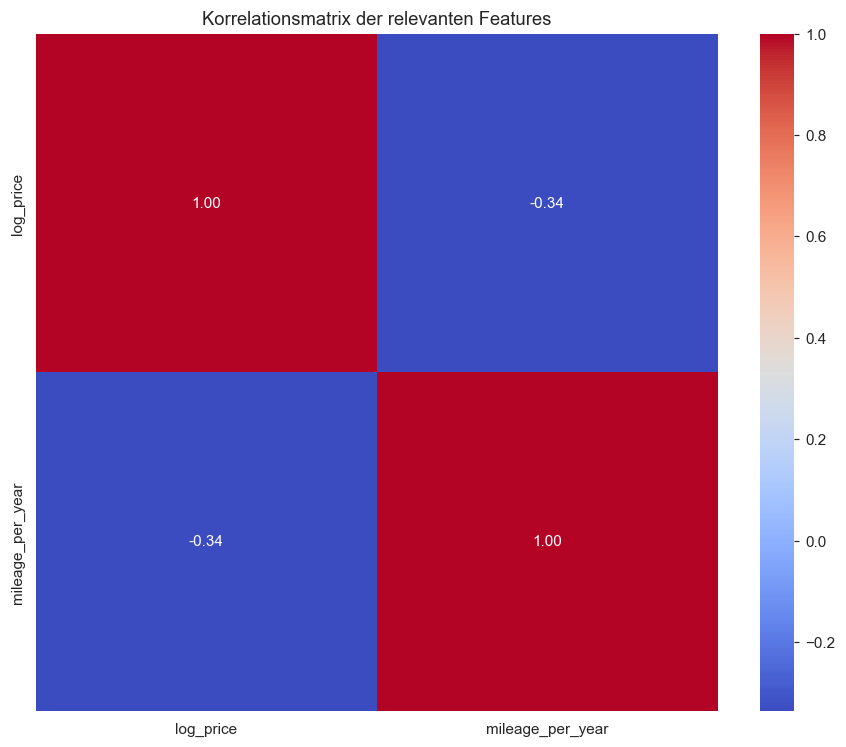


Verwendete Features (X): ['log_hp', 'mileage_per_year', 'make_Abarth', 'make_Aixam', 'make_Alfa', 'make_Alpine', 'make_Audi', 'make_BMW', 'make_Baic', 'make_Brilliance', 'make_Cadillac', 'make_Caravans-Wohnm', 'make_Chevrolet', 'make_Chrysler', 'make_Citroen', 'make_Cupra', 'make_DAF', 'make_DFSK', 'make_DS', 'make_Dacia', 'make_Daihatsu', 'make_Dodge', 'make_Estrima', 'make_Fiat', 'make_Ford', 'make_Honda', 'make_Hyundai', 'make_Infiniti', 'make_Isuzu', 'make_Iveco', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Lada', 'make_Lancia', 'make_Land', 'make_Lexus', 'make_Ligier', 'make_MINI', 'make_Maserati', 'make_Mazda', 'make_Mercedes-Benz', 'make_Microcar', 'make_Mitsubishi', 'make_Nissan', 'make_Opel', 'make_Others', 'make_Peugeot', 'make_Piaggio', 'make_Porsche', 'make_Renault', 'make_SEAT', 'make_Skoda', 'make_SsangYong', 'make_Subaru', 'make_Suzuki', 'make_Tazzari', 'make_Toyota', 'make_Trailer-Anhänger', 'make_Volkswagen', 'make_Volvo', 'make_Zhidou', 'make_smart', 'fuel_CNG', 'f

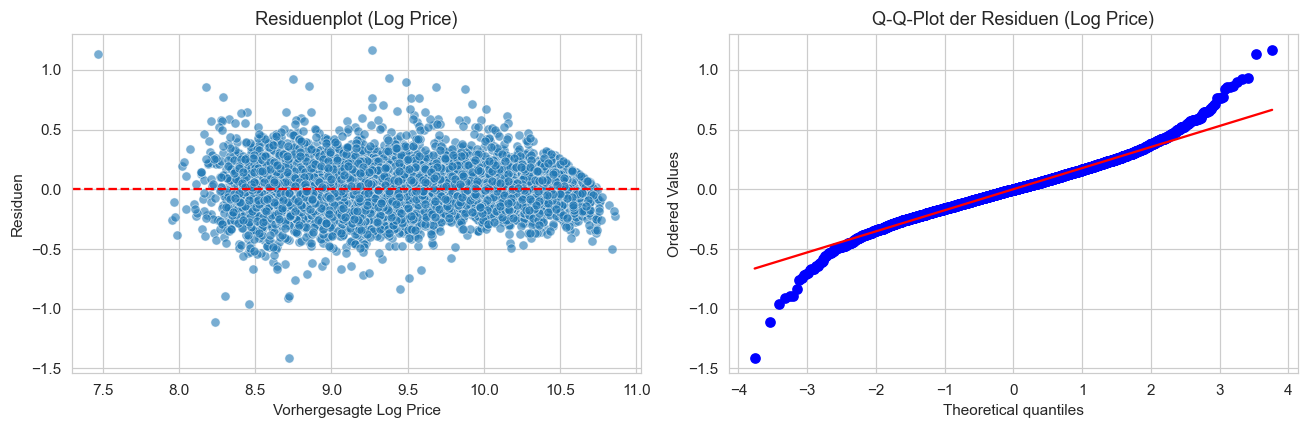


Lasso Regression - R² (auf ursprünglicher Skala): 0.749
Lasso Regression - RMSE (auf ursprünglicher Skala): 4488.29 €

Lasso Koeffizienten (nicht-Null-Werte):
year^2          0.249673
hp year         0.198282
log_hp          0.065159
mileage year   -0.046810
gear_Manual    -0.028162
dtype: float64


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso # Ridge ist importiert, aber nicht direkt im Fokus hier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # PolynomialFeatures neu hinzugefügt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import datetime # Für das aktuelle Jahr

# Duplikate entfernen
df.drop_duplicates(inplace=True)
print(f"Anzahl der Zeilen nach Entfernung von Duplikaten: {len(df)}")

# 1. Datenbereinigung
print("\nFehlende Werte vor der Bereinigung:")
print(df.isnull().sum())

# Numerische Spalten: Fülle mit Median
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

# Kategoriale Spalten: Fülle mit Modus
for col in df.select_dtypes(exclude=np.number).columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nFehlende Werte nach der Bereinigung:")
print(df.isnull().sum())

# 2. Ausreißerbehandlung (nur für numerische Variablen)
df_cleaned = df.copy() # Arbeite auf einer Kopie, um SettingWithCopyWarning zu vermeiden
numeric_cols_for_outliers = ['mileage', 'hp', 'year', 'price']
existing_numeric_cols = [col for col in numeric_cols_for_outliers if col in df_cleaned.columns]

if existing_numeric_cols:
    # NaN-Werte temporär droppen für Z-Score-Berechnung, da Z-Score keine NaN verarbeiten kann
    temp_df_for_zscore = df_cleaned[existing_numeric_cols].dropna()
    if not temp_df_for_zscore.empty:
        z_scores = np.abs(stats.zscore(temp_df_for_zscore))
        # Filtere den ursprünglichen df_cleaned basierend auf den Z-Scores
        # Wichtig: Der Filter muss sich auf die Zeilen des originalen df_cleaned beziehen.
        # Eine gängige Methode ist, den Index der gültigen Zeilen zu nutzen.
        valid_indices = temp_df_for_zscore.index[(z_scores < 3).all(axis=1)]
        df_cleaned = df_cleaned.loc[valid_indices]
        print(f"\nAnzahl der Zeilen nach Entfernung von 3-Sigma-Ausreißern: {len(df_cleaned)}")
    else:
        print("\nNicht genügend Daten nach NaN-Entfernung für Ausreißerbehandlung.")
else:
    print("\nKeine relevanten numerischen Spalten für die Ausreißerbehandlung gefunden.")

df = df_cleaned # Aktualisiere df mit dem bereinigten DataFrame

# 3. Feature-Engineering
# Log-Transformation für rechtsschiefe Variablen (falls zutreffend)
# Beispielhaft für price, mileage, hp
cols_to_log = ['price', 'mileage', 'hp']
for col in cols_to_log:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        if df[col].skew() > 1: # Schwellenwert für Rechtsschiefe
            df[f'log_{col}'] = np.log1p(df[col])
            print(f"Log-Transformation für '{col}' angewendet.")
        else:
            print(f"'{col}' ist nicht rechtsschief genug für Log-Transformation (Schiefe: {df[col].skew():.2f}).")
    else:
        print(f"Warnung: Spalte '{col}' nicht für Log-Transformation gefunden oder nicht numerisch.")


# Interaktionsterme und Polynomielle Features
current_year = datetime.datetime.now().year # Dynamisches aktuelles Jahr

if 'year' in df.columns and 'mileage' in df.columns and pd.api.types.is_numeric_dtype(df['year']):
    df['age'] = current_year - df['year']
    df['age'] = df['age'].replace(0, 1) # Ersetze 0 durch 1, um Division durch Null zu vermeiden
    df['mileage_per_year'] = df['mileage'] / df['age']
    print("Feature 'mileage_per_year' erstellt.")
else:
    print("Warnung: 'mileage' oder 'year' nicht für 'mileage_per_year' gefunden oder 'year' nicht numerisch.")

# --- NEU: One-Hot-Encoding für kategoriale Features ---
categorical_cols = ['make', 'fuel', 'gear'] # Beispiel für kategoriale Features
# Filtere nur die Spalten, die tatsächlich im DataFrame sind
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

if existing_categorical_cols:
    df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)
    print(f"\nOne-Hot-Encoding für {existing_categorical_cols} angewendet.")
    print(f"Neue Spaltenanzahl nach Encoding: {len(df.columns)}")
else:
    print("\nKeine kategorialen Spalten für One-Hot-Encoding gefunden.")

# --- OPTIONAL: Polynomielle Features hinzufügen ---
# Hier kannst du die Features auswählen, für die du Polynomielle Features erstellen möchtest.
# Beispiel: 'mileage', 'hp', 'year'
features_for_poly = ['mileage', 'hp', 'year']
existing_features_for_poly = [f for f in features_for_poly if f in df.columns]

if existing_features_for_poly:
    poly = PolynomialFeatures(degree=2, include_bias=False) # degree=2 für quadratische Terme
    poly_features = poly.fit_transform(df[existing_features_for_poly])
    poly_feature_names = poly.get_feature_names_out(existing_features_for_poly)

    # Füge die neuen polynomielle Features zum DataFrame hinzu
    df_poly_features = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)
    df = pd.concat([df, df_poly_features], axis=1)
    print(f"\nPolynomielle Features (Grad 2) für {existing_features_for_poly} erstellt.")
    print(f"Neue Spaltenanzahl nach Polynom-Features: {len(df.columns)}")
else:
    print("\nKeine Features für Polynomielle Features gefunden.")

# 4. Explorative Analyse (aktualisiert für mögliche neue Features)
# Die Korrelationsmatrix ist hier besonders nützlich nach dem Engineering

# Wähle relevante numerische Spalten für die Korrelationsmatrix, inkl. log_price falls vorhanden
plot_cols = ['mileage', 'hp', 'year', 'price']
if 'log_price' in df.columns:
    plot_cols.remove('price')
    plot_cols.append('log_price')
if 'mileage_per_year' in df.columns:
    plot_cols.append('mileage_per_year')
# Füge hier weitere spezifische erstellte Features hinzu, die du plotten willst

existing_plot_cols = [col for col in plot_cols if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

if len(existing_plot_cols) >= 2:
    print("\nKorrelationsmatrix der relevanten Features:")
    corr_matrix = df[existing_plot_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Korrelationsmatrix der relevanten Features")
    plt.show()
else:
    print("\nNicht genügend numerische Spalten für die Korrelationsmatrix gefunden.")


# 5. Modellvorbereitung
# Zielvariable: log_price bevorzugt, sonst price
y_col_name = 'log_price' if 'log_price' in df.columns else 'price'

# Features: Liste aller relevanten numerischen und One-Hot-kodierten Spalten
# Exkludiere die ursprüngliche price-Spalte und andere nicht-Feature-Spalten
exclude_cols_from_X = [y_col_name, 'price', 'age'] + existing_categorical_cols + features_for_poly # features_for_poly, da deren polynomiale Versionen nun im df sind

X_cols = [col for col in df.columns if col not in exclude_cols_from_X and pd.api.types.is_numeric_dtype(df[col])]

if not X_cols or y_col_name not in df.columns:
    print("Fehler: Nicht genügend Features oder Zielvariable für das Modell gefunden. Bitte überprüfe die Spaltennamen.")
    exit()

X = df[X_cols]
y = df[y_col_name]

print(f"\nVerwendete Features (X): {X.columns.tolist()}")
print(f"Verwendete Zielvariable (y): {y.name}")

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
print(f"Trainingsset Größe: {X_train.shape[0]} Proben")
print(f"Testset Größe: {X_test.shape[0]} Proben")

# 6. Lineare Regression mit erweiterten Checks
if not X.empty:
    # VIF für Multikollinearität
    # Vorsicht: Bei vielen One-Hot-kodierten Spalten kann VIF lange dauern oder fehlschlagen,
    # wenn es perfekte Multikollinearität gibt (z.B. wenn drop_first=False verwendet wurde).
    # Hier wird angenommen, dass es mit drop_first=True passt.
    if X.shape[1] > 0: # Nur berechnen, wenn Features vorhanden sind
        try:
            vif_data = pd.DataFrame()
            vif_data["feature"] = X.columns
            vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
            print("\nVarianzinflationsfaktoren (VIF):")
            print(vif_data.sort_values(by="VIF", ascending=False))
        except Exception as e:
            print(f"\nWarnung bei VIF-Berechnung: {e}. Dies kann bei sehr hoher Multikollinearität passieren.")
    else:
        print("\nKeine Features für VIF-Berechnung vorhanden.")

    # Modelltraining
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Vorhersagen und Metriken
    y_pred = lr.predict(X_test)

    # Wenn log_price verwendet wurde, transformiere Vorhersagen zurück
    if y_col_name == 'log_price':
        y_test_original_scale = np.expm1(y_test) # expm1 ist np.exp(x) - 1, Umkehrung von log1p
        y_pred_original_scale = np.expm1(y_pred)
        # Metriken auf ursprünglicher Skala sind oft aussagekräftiger für den Benutzer
        r2 = r2_score(y_test_original_scale, y_pred_original_scale)
        rmse = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))
        print(f"\nLineare Regression - R² (auf ursprünglicher Skala): {r2:.3f}")
        print(f"Lineare Regression - RMSE (auf ursprünglicher Skala): {rmse:.2f} €")
    else:
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"\nLineare Regression - R²: {r2:.3f}")
        print(f"Lineare Regression - RMSE: {rmse:.2f} €")

    # Modellkoeffizienten
    print("\nModellkoeffizienten (Lineare Regression):")
    for feature, coef in zip(X.columns, lr.coef_):
        print(f"  {feature}: {coef:.4f}")
    print(f"  Achsenabschnitt (Intercept): {lr.intercept_:.4f}")


# 7. Erweitertes Modell mit Regularisierung (Lasso) - Zur Feature-Selektion/Stabilisierung
if not X.empty:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Lasso für Feature-Selektion
    lasso = Lasso(alpha=0.1, random_state=33) # alpha ist der Regularisierungsparameter
    lasso.fit(X_train_scaled, y_train)

    y_pred_lasso = lasso.predict(X_test_scaled)
    if y_col_name == 'log_price':
        y_pred_lasso_original_scale = np.expm1(y_pred_lasso)
        r2_lasso = r2_score(y_test_original_scale, y_pred_lasso_original_scale)
        rmse_lasso = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_lasso_original_scale))
        print(f"\nLasso Regression - R² (auf ursprünglicher Skala): {r2_lasso:.3f}")
        print(f"Lasso Regression - RMSE (auf ursprünglicher Skala): {rmse_lasso:.2f} €")
    else:
        r2_lasso = r2_score(y_test, y_pred_lasso)
        rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
        print(f"\nLasso Regression - R²: {r2_lasso:.3f}")
        print(f"Lasso Regression - RMSE: {rmse_lasso:.2f} €")

    print("\nLasso Koeffizienten (nicht-Null-Werte):")
    lasso_coefs = pd.Series(lasso.coef_, index=X.columns)
    print(lasso_coefs[lasso_coefs != 0].sort_values(key=abs, ascending=False)) # Zeigt nur relevante Features
else:
    print("\nLasso Regression konnte nicht durchgeführt werden, da die Feature-Matrix leer ist.")